# Designing a Metric to Measure the Healthiness of Cereal
If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same to eat Fruity Pebbles again. Using this dataset on 77 different types of cereal from Kaggle, we will attempt to determine whether certain brands of cereal are **significantly healthier** than other brands by designing a metric to measure how healthy each brand is.

## Understanding the dataset
The dataset has the following 16 columns:
- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type:
    - cold
    - hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

In [39]:
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import seed

import pandas as pd

from scipy.stats import shapiro, ttest_1samp

## Cleaning the data

In [40]:
df = pd.read_csv('cereal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


As noted earlier, there are 77 different cereal products and 16 columns, and there are no missing values.

In [41]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Although there are no missing values, we notice that there are values of -1 in **carbo**, **sugars**, and **potass**. Clearly, this can't be possible, which indicates a value of -1 indicates a missing value. Let's replace all values of -1 with a missing value.

In [42]:
df = df.replace(-1, np.nan)
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [43]:
pd.isna(df).any(axis=1).sum()

3

Only 3 out of the 77 products have missing values and we have no reliable way to replace these missing values since each cereal is unique. Therefore, let's drop these 3 products from our dataset. 

In [44]:
df = df.dropna()

Now our dataset should be ready for use.

## Which features should we use?
Before formulating a metric of cereal healthiness, we need to:
- Determine which features are relevant to healthiness
- Identify each relevant feature's relationship with healthiness

We will go through each of the 16 features and decide which ones we will use.

**name**
- It is not related to healthiness.
- Verdict: **dismissed**

**mfr**
- This categorical variable refers to the manufacturer of the cereal.
- One manufacturer can make multiple cereals of varying healthiness, so mfr is unimportant.
- Verdict: **dismissed**

**type**
- This categorical variable tells whether the cereal is meant to be eaten hot or cold.
- Small changes in temperature at the time of consumption do not affect a cereal's healthiness.
- Verdict: **dismissed**

**calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins**
- All of these features are directly related to the nutrition provided by the cereal.
- Verdict: **considered**

**shelf**
- This is a categorical variable which indicates the shelf level where the cereal is displayed.
- This is unrelated to the nutritional content of the cereals.
- Verdict: **dismissed**

**weight and cups**
- These represent the mass and volume (respectively) of one serving of cereal.
- These are unrelated to the nutritional content of the cereals.
- Verdict: **dismissed**

**rating**
- This feature shows customers' subjective ratings of the cereal's quality.
- This is mostly influenced by the cereal's taste.
- This does not objectively describe the cereal's nutritional content.
- Verdict: **dismissed**

In summary, we will use the following features in our metric:
- calories
- fat
- fiber
- sugars
- carbo
- protein
- vitamins
- potass
- sodium

We will now research each feature's relationship with healthiness.

## Features' relationship with health
Once again, let's go over each feature in the list.

For every feature we will consider:

- How is the nutrient related to healthiness?
    - Note, the term "unhealthy nutrient" in this section will refer to a nutrient that is:
        - easily/commonly overindulged
        - very harmful when overindulged
        
- How much of the nutrient should be consumed in one serving?
    - The percentage of the recommended Daily Value (% DV) will be checked, if applicable.
    
- The column's values will be transformed as needed, and added to the transformed_df DataFrame:
    - (The name column is included so that the name of a cereal can be identified later on.)

In [45]:
transformed_df = pd.DataFrame()
transformed_df["name"] = df["name"]

transformed_df

,name
0,100% Bran
1,100% Natural Bran
2,All-Bran
3,All-Bran with Extra Fiber
5,Apple Cinnamon Cheerios
6,Apple Jacks
7,Basic 4
8,Bran Chex
9,Bran Flakes
10,Cap'n'Crunch


Whether the transformed feature should be *maximized* or *minimized* to get a high "healthiness score" shall be determined. Either "max" or "min" will be appended to the **roles_dict** dictionary.

In [46]:
roles_dict = {}

### Calories
How many calories should one consume?

The FDA's Understanding and Using the Nutrition Facts Label (2020) p. 1 states:

> "To achieve or maintain a healthy body weight, balance the number of calories you eat and drink with the number of calories your body uses. 2,000 calories a day is used as a general guide for nutrition advice."

Calories should be kept in moderation so that 2000 are consumed in a day.

- The Daily Values recommended by the FDA are based on this calorie diet.

Cereals are only eaten as one meal or snack per day.

What is considered a moderate amount of calories for cereal?

The same article by the FDA states:

>"100 calories per serving of an individual packaged food is considered moderate and 400 calories or more per serving of an individual packaged food is considered high"

Therefore, for the calories column, 100 will be considered the ideal number of calories.
- There is no such thing as a % Daily Value for calories which can be used as a standard.

As a factor for our healthiness metric, the calories column will be transformed into the distance of each value from 100, **calorie_dist**:

count    74.000000
mean     15.135135
std      14.547348
min       0.000000
25%      10.000000
50%      10.000000
75%      20.000000
max      60.000000
Name: calorie_dist, dtype: float64


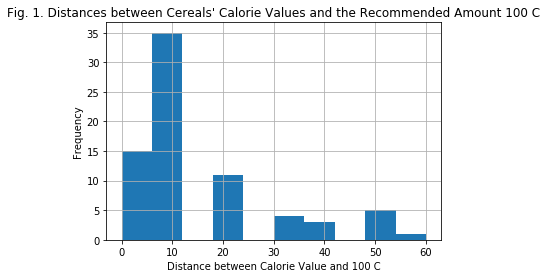

In [47]:
transformed_df["calorie_dist"] = np.abs(df["calories"] - 100)

print(transformed_df["calorie_dist"].describe())

# Show a histogram.
transformed_df.hist("calorie_dist")
plt.title("Fig. 1. Distances between Cereals' Calorie Values and the Recommended Amount 100 C")
plt.xlabel("Distance between Calorie Value and 100 C")
plt.ylabel("Frequency")
plt.show()

We notice:
- The distances from 100 calories range from 0 to 60 calories.
- On average, each cereal's calorie value is 15 calories away from 100 calories.

This factor represents the distance from the ideal value. Therefore, this factor should be: **MINIMIZED**

In [48]:
roles_dict["calorie_dist"] = "min"

### Fat
The **fat** column represents Total Fat, which includes Saturated Fat, Trans Fat, and Monosaturated/Polysaturated Fat. According to the FDA:
- Saturated fat and trans fat are unhealthy nutrients.
- Monounsaturated and polyunsaturated fats are healthy nutrients and are recommended in place of the other two fats.
Since our data does not provide what percentage of the Total Fat is saturated and trans, we will treat the **fat** feature as generally unhealthy to be safe. 

The FDA also recommends 78g of Fat per day, so for each value in the **fat** column, we will **divide by 78** and **multiply by 100** to get the % DV. 

count    74.000000
mean      1.282051
std       1.290803
min       0.000000
25%       0.000000
50%       1.282051
75%       1.282051
max       6.410256
Name: fat, dtype: float64


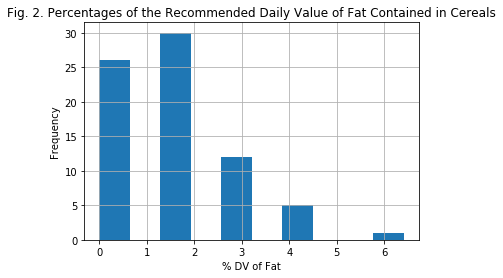

In [49]:
transformed_df["fat"] = df["fat"] / 78 * 100

print(transformed_df["fat"].describe())

# Show a histogram.
transformed_df.hist("fat")
plt.title("Fig. 2. Percentages of the Recommended Daily Value of Fat Contained in Cereals")
plt.xlabel("% DV of Fat")
plt.ylabel("Frequency")
plt.show()

We notice:
- The cereals' % DV fat values range from 0% to 6%.
- On average, each cereal contains 1% of the recommended Daily Value of fat.
- These values are very low, according to the standard.

We will assume fat is unhealthy for this data. Therefore, this factor should be: **MINIMIZED**

In [50]:
roles_dict["fat"] = "min"

### Fiber
The FDA's Dietary Fiber fact sheet (2020) states that "Dietary fiber is a nutrient to get more of." Fiber is a healthy nutrient. The article also states that the daily value for fiber is 28g.
Therefore, for each value in the **fiber** column, we will **divide by 28** and **multiply by 100** to get the % DV.

count    74.000000
mean      7.770270
std       8.654969
min       0.000000
25%       0.892857
50%       7.142857
75%      10.714286
max      50.000000
Name: fiber, dtype: float64


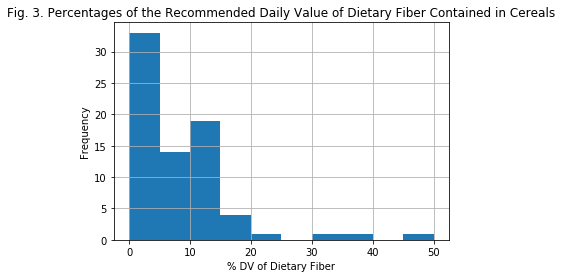

In [51]:
transformed_df["fiber"] = df["fiber"] / 28 * 100

print(transformed_df["fiber"].describe())

# Show a histogram.
transformed_df.hist("fiber")
plt.title("Fig. 3. Percentages of the Recommended Daily Value of Dietary Fiber Contained in Cereals")
plt.xlabel("% DV of Dietary Fiber")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV fiber values range from 0% all the way up to 50%.
- On average, each cereal contains 7% of the recommended Daily Value of fiber.
- These values are mostly low to moderate with a few very high outliers according to the standard.

This factor should be: **MAXIMIZED**

In [52]:
roles_dict["fiber"] = "max"

### Sugars
According to the FDA's Total and Added Sugars fact sheet (2020), "Diets high in calories from added sugars can make it difficult to meet daily recommended levels of important nutrients while staying within calorie limits." We will assume the **sugars** feature is unhealthy. The same article states:
- "The Daily Value for added sugars is less than 50 g per day."
- "5% DV or less of added sugars per serving is considered low 20% DV or more of added sugars per serving is considered high."

For each value in the **sugars** column, we will **divide by 50** and **multiply by 100** to get the % DV.

count    74.000000
mean     14.216216
std       8.718223
min       0.000000
25%       6.000000
50%      14.000000
75%      22.000000
max      30.000000
Name: sugars, dtype: float64


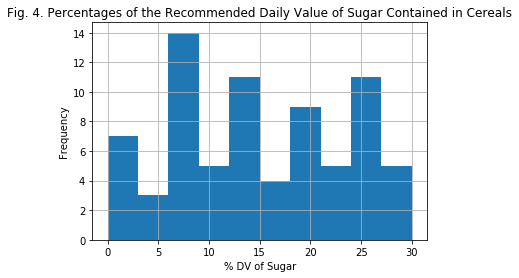

In [53]:
transformed_df["sugars"] = df["sugars"] / 50 * 100

print(transformed_df["sugars"].describe())

# Show a histogram.
transformed_df.hist("sugars")
plt.title("Fig. 4. Percentages of the Recommended Daily Value of Sugar Contained in Cereals")
plt.xlabel("% DV of Sugar")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV sugar values range from 0% all the way up to 30%.
- On average, each cereal contains 14% of the recommended Daily Value of sugar.
- Sugar is the feature with the most values which can be described as high (over 20% DV):

In [54]:
print("Number of high-sugar cereals:", sum(transformed_df["sugars"] >= 20))

Number of high-sugar cereals: 26


This factor should be: **MINIMIZED**

In [55]:
roles_dict["sugars"] = "min"

### Carbo
The **carbo** column in our dataset represents **complex carbohydrates**. The FDA states that "Complex carbohydrates are key to long-term health. They make it easier to maintain a healthy weight and can even help guard against type 2 diabetes and cardiovascular problems in the future." They should be considered a healthy nutrient. **Complex carbohydrates** are not typically included as part of a Nutrition Fact Label, so to determine the recommended Daily Value, we will add the **fiber, sugars, and carbo** columns to comprise **Total carbohydrate**. 



In [56]:
carb_cols = df[["fiber", "sugars", "carbo"]]

total_carb = pd.Series(
    carb_cols.sum(axis = 1),
    name = "total_carb",
)

carb_cols.join(total_carb)

,fiber,sugars,carbo,total_carb
0,10.0,6.0,5.0,21.0
1,2.0,8.0,8.0,18.0
2,9.0,5.0,7.0,21.0
3,14.0,0.0,8.0,22.0
5,1.5,10.0,10.5,22.0
6,1.0,14.0,11.0,26.0
7,2.0,8.0,18.0,28.0
8,4.0,6.0,15.0,25.0
9,5.0,5.0,13.0,23.0
10,0.0,12.0,12.0,24.0


The FDA considers carbohydrates a generally healthy nutrient and states that the Daily Value is 275g. Therefore, for each value in the **total_carb** column, we will **divide by 275** and **multiply by 100** to get the % DV.

count    74.000000
mean      8.732187
std       1.377135
min       4.000000
25%       8.090909
50%       8.727273
75%       9.090909
max      12.000000
Name: total_carb, dtype: float64


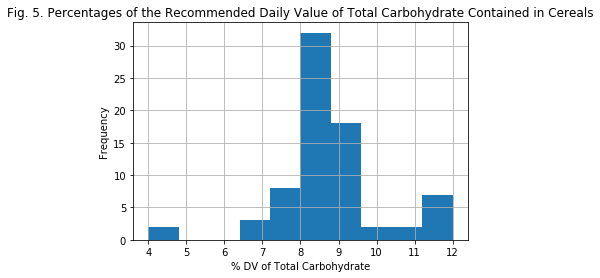

In [57]:
transformed_df["total_carb"] = total_carb / 275 * 100

print(transformed_df["total_carb"].describe())

# Show a histogram.
transformed_df.hist("total_carb")
plt.title("Fig. 5. Percentages of the Recommended Daily Value of Total Carbohydrate Contained in Cereals")
plt.xlabel("% DV of Total Carbohydrate")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV Total Carbohydrate values range from 4% to 12%.
- On average, each cereal contains 9% of the recommended Daily Value of sugar.
- These values are low to moderate, according to the standard.

This feature will be: **MAXIMIZED**

In [58]:
roles_dict["total_carb"] = "max"

### Protein
The FDA's Protein (2020) fact sheet p. 1 says that protein provides energy; makes up the cells, tissue, muscles and even fluids in the human body; helps repair cells; contributes to many body processes.

In summary, it is a very important nutrient; the human body needs a lot of it. The FDA recommends 50g of protein per day. Therefore, for each value in the **protein** column, we will **divide by 50** and **multiply by 100** to get the % DV.

count    74.000000
mean      5.027027
std       2.151603
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: protein, dtype: float64


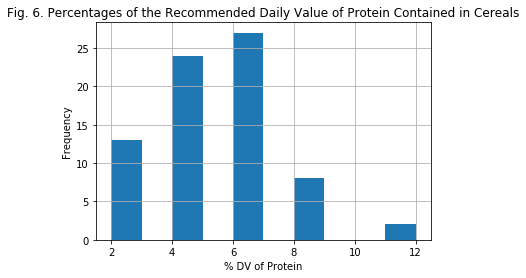

In [59]:
transformed_df["protein"] = df["protein"] * 2

print(transformed_df["protein"].describe())

# Show a histogram.
transformed_df.hist("protein")
plt.title("Fig. 6. Percentages of the Recommended Daily Value of Protein Contained in Cereals")
plt.xlabel("% DV of Protein")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV protein values range from 2% to 12%.
- On average, each cereal contains 5% of the recommended Daily Value of protein.
- These values are low to moderate according to the standard.

These values are generally low, so more protein will simply be considered as better. Therefore, this factor should be: **MAXIMIZED**

In [60]:
roles_dict["protein"] = "max"

### Vitamins
The FDA states, "Diets rich in vitamins and minerals promote growth, development, and normal body functioning." Vitamins are a healthy nutrient. Each vitamin has a different recommended Daily Value, but the **vitamins** column in our dataset is already presented as % DV. 

In [61]:
print(df["vitamins"].value_counts())

25     62
100     6
0       6
Name: vitamins, dtype: int64


The **vitamins** column only contains 3 unique values, where 25% is overwhelmingly the most common value. 100% DV of vitamins in one serving is extremely high. One will still consume other vitamins from other meals in the same day. Consuming too much vitamins is unhealthy.

Common sense would dictate that it is best to have 25% DV vitamins in one serving, as it is plenty but not too high.

Therefore, the **vitamins** column's values should be scored in the following manner:
- 25 becomes 3
- 0 becomes 2
- 100 becomes 1

...where higher is better for the transformed value.

The transformed column will be called **vit_score.**

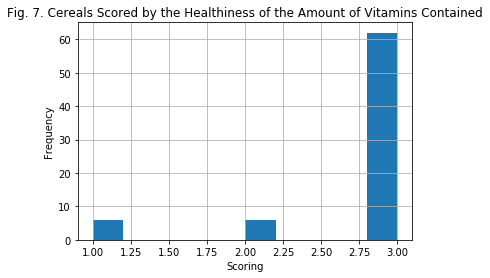

In [62]:
transformed_df["vit_score"] = df["vitamins"].replace(
    [25, 0, 100],
    [3, 2, 1],
)

# Show a histogram.
transformed_df.hist("vit_score")
plt.title("Fig. 7. Cereals Scored by the Healthiness of the Amount of Vitamins Contained")
plt.xlabel("Scoring")
plt.ylabel("Frequency")
plt.show()

This feature should be: **MAXIMIZED**

In [63]:
roles_dict["vit_score"] = "max"

### Potass
The FDA describes potassium as a "nutrient to get more of." Potassium is a healthy nutrient. The FDA also states that the recommended Daily Value is 4700mg per day. Therefore, for each value in the **potass** column, we will **divide by 4700** and **multiply by 100** to get the % DV.

count    74.000000
mean      2.096032
std       1.508057
min       0.319149
25%       0.877660
50%       1.914894
75%       2.553191
max       7.021277
Name: potass, dtype: float64


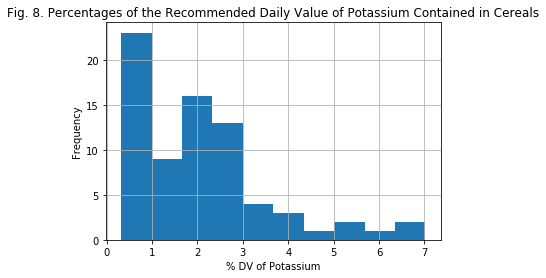

In [64]:
transformed_df["potass"] = df["potass"] / 4700 * 100

print(transformed_df["potass"].describe())

# Show a histogram.
transformed_df.hist("potass")
plt.title("Fig. 8. Percentages of the Recommended Daily Value of Potassium Contained in Cereals")
plt.xlabel("% DV of Potassium")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV potassium values range from almost 0% to 7%.
- On average, each cereal contains 2% of the recommended Daily Value of sodium.
- These values are very low according to the standard.

Since the values are so low, more potassium will simply be considered as better. This factor will be: **MAXIMIZED**

In [65]:
roles_dict["potass"] = "max"

### Sodium
The FDA states, "According to the Dietary Guidelines for Americans, diets higher in sodium are associated with an increased risk of developing high blood pressure, which can raise the risk of heart attacks, heart failure, stroke, kidney disease, and blindness." Sodium is an unhealthy nutrient when consumed in excess. The FDA recommends 2,300mg per day. Therefore, for each value in the **sodium** column, we will **divide by 2300* and **multiply by 100** to get the % DV.

count    74.000000
mean      7.059342
std       3.598686
min       0.000000
25%       5.869565
50%       7.826087
75%       9.456522
max      13.913043
Name: sodium, dtype: float64


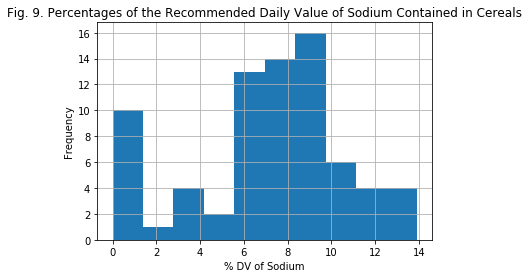

In [66]:
transformed_df["sodium"] = df["sodium"] / 2300 * 100

print(transformed_df["sodium"].describe())

# Show a histogram.
transformed_df.hist("sodium")
plt.title("Fig. 9. Percentages of the Recommended Daily Value of Sodium Contained in Cereals")
plt.xlabel("% DV of Sodium")
plt.ylabel("Frequency")
plt.show()

Notice:
- The cereals' % DV sodium values range from 0% to 14%.
- On average, each cereal contains 7% of the recommended Daily Value of sodium.
- These values are low to moderate according to the standard.

This factor will be: **MINIMIZED**

In [67]:
roles_dict["sodium"] = "min"

### Summary of the Features' Relationship to Health
Here is a summary of the features in transformed_df and whether these should be maximized or minimized:

In [68]:
roles_df = pd.DataFrame({
    "feature": list(roles_dict.keys()),
    "role": list(roles_dict.values()),
})

print(roles_df)

        feature role
0  calorie_dist  min
1           fat  min
2         fiber  max
3        sugars  min
4    total_carb  max
5       protein  max
6     vit_score  max
7        potass  max
8        sodium  min


### Method of Multiple Criteria Decision Analysis
Multiple criteria decision analysis refers to:
- ranking data points (i.e., from "best" to "worst") based on multiple criteria (features), usually in order to make a decision based on the rankings.

In this project, our goal is to rank cereals by their healthiness based on their nutritional features.

### Multiplicative Scoring
We will use a mutliplicative score function where feature values are mutliplied together.

### The Healthiness Metric
For our metric, we will:
- **multiply** features to **maximize**
- **divide** features to **minimize**

Therefore, our metric for a cereal's overall healthiness is

$$score = \frac{\text{fiber * total_carb * protein * vit_score * potass}}{\text{calorie_dist * fat * sugars * sodium}}$$

### Applying the metric
We will split the features from each other by role:

In [69]:
# Add 0.01 to all values in order to avoid errors from 0's.

max_df = (df[["fiber", "protein", "potass"]] # Original data
             .join(transformed_df[["total_carb", "vit_score"]]) # Transformed data
             .add(0.01)
         )

min_df = (df[["fat", "sugars", "sodium"]] # Original data
             .join(transformed_df["calorie_dist"]) # Transformed data
             .add(0.01)
         )

Apply multiplicative scoring to make a new leaderboard_df containing cereal names and scores.

In [70]:
# Get the product Series of each DataFrame.
max_prod = max_df.product(axis = 1)
min_prod = min_df.product(axis = 1)

# Divide `max_prod` by `min_prod` to get the scores.
score = max_prod.divide(min_prod)

# Append the final scores as a column to a new `leaderboard_df`.
leaderboard_df = pd.DataFrame()
leaderboard_df["name"] = transformed_df["name"]
leaderboard_df["score"] = score

print(leaderboard_df)

                                      name         score
0                                100% Bran  1.092282e+01
1                        100% Natural Bran  8.929545e-01
2                                 All-Bran  6.739676e+00
3                All-Bran with Extra Fiber  6.383998e+05
5                  Apple Cinnamon Cheerios  1.413095e-01
6                              Apple Jacks  9.899943e+00
7                                  Basic 4  1.829320e-01
8                                Bran Chex  2.271197e+00
9                              Bran Flakes  6.857242e+02
10                            Cap'n'Crunch  8.750388e-05
11                                Cheerios  4.718427e+00
12                   Cinnamon Toast Crunch  9.617253e-05
13                                Clusters  7.756843e-01
14                             Cocoa Puffs  6.428134e-04
15                               Corn Chex  1.632251e-01
16                             Corn Flakes  3.206586e+04
17                             

Notice:

The final scores turn out to have a wide range.
- Some scores are very large; others are very close to 0.
- This is expected since a multiplicative score function was used, and there were so many features to multiply and divide.
- However, this makes the scores difficult to interpret and compare.

For ease of comparison, let us simply rank all cereals and arrange them by healthiness:

In [71]:
leaderboard_df["score_rank"] = leaderboard_df["score"].rank(
    method = "dense",
    ascending = False,
)

leaderboard_df = leaderboard_df.sort_values("score_rank")
print(leaderboard_df)

                                      name         score  score_rank
26                     Frosted Mini-Wheats  3.399388e+09         1.0
64                  Shredded Wheat 'n'Bran  2.841489e+09         2.0
65               Shredded Wheat spoon size  1.828212e+09         3.0
63                          Shredded Wheat  3.995120e+08         4.0
55                            Puffed Wheat  1.636281e+07         5.0
60                          Raisin Squares  1.862071e+06         6.0
3                All-Bran with Extra Fiber  6.383998e+05         7.0
43                                   Maypo  2.610005e+05         8.0
23                             Double Chex  4.487350e+04         9.0
16                             Corn Flakes  3.206586e+04        10.0
54                             Puffed Rice  2.886487e+04        11.0
53                              Product 19  1.253615e+04        12.0
75                                Wheaties  4.131485e+03        13.0
74                              Wh

Now, each score is ranked, with 1 referring to the healthiest cereal.
- The healthiest cereal is Frosted Mini-Wheats.
- The least healthy cereal is Cap'n'Crunch.

Here is the full leaderboard of cereals:

In [72]:
pd.set_option("display.max_rows", None)
print(leaderboard_df)

                                      name         score  score_rank
26                     Frosted Mini-Wheats  3.399388e+09         1.0
64                  Shredded Wheat 'n'Bran  2.841489e+09         2.0
65               Shredded Wheat spoon size  1.828212e+09         3.0
63                          Shredded Wheat  3.995120e+08         4.0
55                            Puffed Wheat  1.636281e+07         5.0
60                          Raisin Squares  1.862071e+06         6.0
3                All-Bran with Extra Fiber  6.383998e+05         7.0
43                                   Maypo  2.610005e+05         8.0
23                             Double Chex  4.487350e+04         9.0
16                             Corn Flakes  3.206586e+04        10.0
54                             Puffed Rice  2.886487e+04        11.0
53                              Product 19  1.253615e+04        12.0
75                                Wheaties  4.131485e+03        13.0
74                              Wh

## Significance of the results
We still question if there is a significant difference in raw healthiness score among the cereals.
- What is the distribution of healthiness scores?
- Are the "healthiest cereals" significantly better than the rest?
- Are the "least healthy cereals" significantly worse than the rest?

From the point of view of a consumer, we want to know if these cereals are **worth eating over other ones.**

## Healthiness score distribution
### Score histogram

count    7.400000e+01
mean     1.147009e+08
std      5.509466e+08
min      8.750388e-05
25%      1.499761e-01
50%      2.341280e+00
75%      1.041607e+03
max      3.399388e+09
dtype: float64


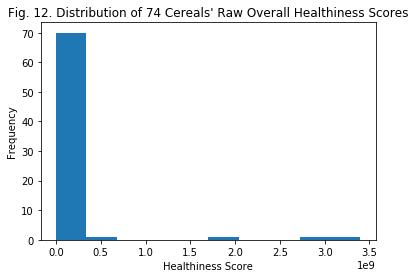

In [73]:
print(score.describe())

plt.hist(score)

plt.title("Fig. 12. Distribution of 74 Cereals' Raw Overall Healthiness Scores")
plt.xlabel("Healthiness Score")
plt.ylabel("Frequency")

plt.show()

Notice:
- The scores range vastly, from 8.8e-05 to 3.4e+09.
- There appear to be large differences between scores, not just based on the histogram but on the scores in the leaderboard seen earlier.
- The data is skewed to the right.
- Most scores are 0.5e+09 or below.

In summary, it is clear that:
- The distribution of scores is not normal.
- The healthiest cereals appear to be **significantly more healthy** than the vast majority of cereals.

### Statistical Difference: Top 3
We used the graph to determine that the top 3 healthy cereals are:
- Frosted Mini-Wheats (3.4e+09)
- Shredded Wheat 'n'Bran (2.8e+09)
- Shredded Wheat spoon size (1.8e+09)

This can also be determined statistically using Student's T-test.

Specifically, **scipy.stats.ttest_1samp** will be used, which is for the mean of one group of scores.

H0, the null hypothesis, is that the mean of a sample is equal to the mean of its population.

The test will return two values:
- a test-statistic
- a p-value

An alpha of 5% or 0.05 will be used, where:
- p <= alpha means that H0 is rejected.
- p > alpha means that H0 fails to be rejected.

In [74]:
# Get the top 3 scores.
top_3 = score.nlargest(3)

# Seed the random number generator.
seed(1)

# Calculate the T-test.
stat, p = ttest_1samp(top_3, score.mean())

print("Statistic:", stat)
print("p-value:", p)

Statistic: 5.599449561632445
p-value: 0.03044500876754308


p < 0.05. Therefore, the null hypothesis is rejected and the top 3 scores are **significantly different** from the rest of the scores. The top 3 cereals are **significantly healthier** than the rest.

## Conclusion
This project aimed to determine whether or not certain brands of cereal were significantly healthier or less healthy than others.

Features in the original 80 Cereals dataset were chosen, transformed, and assigned roles for them to be used in an overall metric for the healthiness of a cereal:
$$score = \frac{\text{fiber * total_carb * protein * vit_score * potass}}{\text{calorie_dist * fat * sugars * sodium}}$$

We performed a t-test and concluded that the top 3 scores were statistically different from the rest of the scores. Therefore, it can be concluded that the healthiness of different cereal brands varies significantly.

The null hypothesis, which states, "There is no significant difference in overall healthiness among the different cereal products," is rejected.